**Содержание темы**

1. [Теория](https://colab.research.google.com/drive/1J63iIsxX-cFs7Er_F-ibZKC37rMq-iAO?usp=sharing)

2. Практика 1 

3. [Практика 2](https://colab.research.google.com/drive/1u-C4YluObVMEcjeOk8WnqQGm5AueaK_i?usp=sharing)


## Алгоритм K-Means

Перейдем к практической части урока по кластеризации данных. Для этого используем набор данных цветков ирисов  Фишера (*iris*) - это классический и очень простой датасет для многоклассовой классификации из библиотеки **sklearn**.

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

- Длина наружной доли околоцветника (англ. *sepal length*);
- Ширина наружной доли околоцветника (англ. *sepal width*);
- Длина внутренней доли околоцветника (англ. *petal length*);
- Ширина внутренней доли околоцветника (англ. *petal width*).

Попробуем применить изученные алгоритмы кластеризации для этого датасета. Начнем с *K-Means*, разберем его подробнее.

Импортируем необходимые библиотеки:

In [ ]:
# Импорт датасета из библиотеки sklearn
from sklearn.datasets import load_iris

# Подключение библиотеки отображения графиков
import matplotlib.pyplot as plt

# Подключение библиотеки для работы с таблицами
import pandas as pd

# Импорт алгоритмов кластеризации
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Импорт метрики качества кластеризации
from sklearn.metrics.cluster import adjusted_rand_score

Загрузим данные, посмотрим их формат:

In [ ]:
# Загрузка датасета 
iris = load_iris()

# Вывод признаков классов
print(iris.feature_names)

# Вывод меток классов
print(iris.target)

# Вывод названий классов
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


Теперь создадим и обучим модель алгоритма K-Means. 

Основные характеристики:
- 11 параметров
- по умолчанию: 10 начальных запусков, кластеризация на 8 групп

Основные параметры: 
- **n_clusters** - Количество кластеров, которые нужно сформировать, а также количество центроидов, которые необходимо создать.
- **init: ‘k-means+’, ‘random’, ndarray** - начальное
приближение
- **max_iter** - кол-во итераций

Основные методы:

- **fit** - вычисление кластеризации
- **predict** - прогноз ближайшего кластера, к которому принадлежит каждый образец.
- **fit_predict** - вычисление центров кластеров и прогноз индексов кластера для каждой выборки 
- **transform** - преобразование в пространство кластерных расстояний 
- **fit_transform** - вычисление кластеризации и преобразование в пространство кластерных расстояний



In [ ]:
# Создание модели алгоритма K-Means для деления на три кластера                                                                    
model = KMeans(n_clusters=3)

# Вычисление кластеризации 
model.fit(iris.data)

# Результат кластеризации
predictions = model.predict(iris.data)

# Вывод результатов кластеризации
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


На данном наборе данных, учитывая то, что названия классов не важны, можно заметить, что один класс был выделен в отдельный кластер со 100% совпадением с исходными метками, остальные же два класса выделены неверно. 

Оценим качество кластеризации с помощью метрики **ARI**, так как нам известны метки реальных классов:

In [ ]:
# Оценка качества кластеризации с помощью метрики ARI
adjusted_rand_score(predictions, iris.target)

0.7302382722834697

Судя по метрике, алгоритм кластеризовал данные верно на 73%. Посмотрим, как справится с той же задачей алгоритм *Agglomerative Clastering*.

##  Алгоритм Agglomerative Clastering

Рассмотрим подробнее класс *Agglomerative Clustering*:

Основные параметры:
- **n_clusters** - количество кластеров 
- **linkage: «ward», «complete», «average»** - критерий связи, определяет, какое расстояние использовать между наборами точек
- **affinity: “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, «precomputed»** (для `linkage = «ward»` доступно только евклидово) - метрика для вычисления связи
- **connectivity** - матрица связности.

Основные методы:
- **fit** - иерархическая кластеризация объектов
- **fit_predict** - подбор и определение результата кластеризации

In [ ]:
# Создание модели алгоритма AgglomerativeClustering для деления на три кластера                                                                    
model1 = AgglomerativeClustering(n_clusters=3)

# Вычисление и результат кластеризации
predictions1 = model1.fit_predict(iris.data)

# Вывод результатов кластеризации
print(predictions1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Видим, что первый класс также выделен правильно, точность выделения второго и третьего класса очень похожа на результаты кластеризации K-Means. Проверим наши выводы с помощью метрики:

In [ ]:
# Оценка качества кластеризации с помощью метрики ARI
adjusted_rand_score(predictions1, iris.target)

0.7311985567707745

Метрика показывает правильность кластеризации 73%, т.е. результат почти такой же, как и в первом алгоритме.

Есть ещё один способ визуализации результатов иерархической кластеризации - это дендрограмма из библиотеки **SciPy**. 

Реализуем её для нашего результата:

In [ ]:
# Импорт дендрограммы и функции кластеризации ward 
from scipy.cluster.hierarchy import dendrogram, ward, linkage

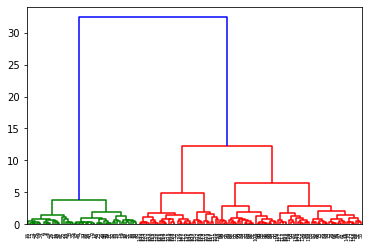

In [ ]:
# Получение массива расстояний, вычисленных в ходе аггломеративной кластеризации
linkage_array = ward(iris.data)

# Строим дендрограмму, указав параметры удобные для отображения
dn = dendrogram(linkage_array)

Получившаяся дендрограмма показывает, что выделение первого кластера (зеленые линии) происходит более определенно, чем выделение соседних двух, которые, по сути, могут быть объединены в один кластер.

Попробуем ещё один рассмотренный нами алгоритм - DBSCAN.

## Алгоритм DBSCAN



Напомним, что основное отличие алгоритма DBSCAN от двух предыдущих заключается в том, что для его работы не требуется информация о количестве кластеров.

Основные параметры:
- **eps** - размер окрестности
- **min_samples** - кол-во точек в окрестности ядра

Основные методы:
- **fit** - кластеризация DBSCAN по объектам или матрице расстояний
- **fit_predict** - вычисление кластеров из матрицы данных или расстояний и прогноз меток

Так как для данного алгоритма мы не можем задать количество кластеров, а количество точек каждого кластера примерно одинаково, с помощью цикла попробуем подобрать оптимальные параметры **eps**:

In [ ]:
# Импорт библиотеки для работы с массивами
import numpy as np

# Перебор значений окрестности от 0.1 до 2.0 с шагом 0.1
for i in np.arange(0.1, 2.0, 0.1):

    # Создание модели алгоритма DBSCAN                                                                    
    model2 = DBSCAN(eps=i, min_samples=2)

    # Вычисление и результат кластеризации
    predictions2 = model2.fit_predict(iris.data)

    # Вывод оценки качества для заданного значения
    print(f'eps:{i}, ARI: {adjusted_rand_score(predictions2, iris.target)}')

eps:0.1, ARI: 0.002668329648317235
eps:0.2, ARI: 0.06275140148244816
eps:0.30000000000000004, ARI: 0.2737404855411581
eps:0.4, ARI: 0.7048053311544831
eps:0.5, ARI: 0.5232609135042579
eps:0.6, ARI: 0.539513868348372
eps:0.7000000000000001, ARI: 0.5617321312902849
eps:0.8, ARI: 0.5637510205230709
eps:0.9, ARI: 0.5681159420289855
eps:1.0, ARI: 0.5681159420289855
eps:1.1, ARI: 0.5681159420289855
eps:1.2000000000000002, ARI: 0.5681159420289855
eps:1.3000000000000003, ARI: 0.5681159420289855
eps:1.4000000000000001, ARI: 0.5681159420289855
eps:1.5000000000000002, ARI: 0.5681159420289855
eps:1.6, ARI: 0.5681159420289855
eps:1.7000000000000002, ARI: 0.0
eps:1.8000000000000003, ARI: 0.0
eps:1.9000000000000001, ARI: 0.0


По результатам видно, что максимальная точность получилась при радиусе окрестности 0.4, выведем полученные метки:

In [ ]:
# Создание модели алгоритма DBSCAN                                                                    
model2 = DBSCAN(eps=0.4, min_samples=2)

# Вычисление и результат кластеризации
predictions2 = model2.fit_predict(iris.data)

# Вывод результатов кластеризации
print(predictions2)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1 -1  1 -1  1  1  1  3  1  4  1
  4  1  1  1  1  1  1  1  1  1  1  4  1  1  1  3  1  1  1  1  1  2  1  1
  1  1  2  1 -1  4  4  4  4  5 -1  6 -1 -1  4  4  4  4 -1  4  4 -1 -1 -1
  4  4  5  4  4  4  4  4  4  4  6 -1  4  4 -1 -1  4  4  4  4  4  4  4  4
  4  4  4  4  4  4]


По меткам видно, что многие экземпляры были отнесены алгоритмом к классу выбросов (-1), остальные поделены на семь классов, четыре из которых очень малы, основная же масса также состоит из трех классов, поэтому и достигнута точность в 70%.

**Вывод:**

При сравнении трёх алгоритмов кластеризации на наборе данных ирисов были получены приблизительно равные результаты и ни один из них не превысил 75%. По результатам кластеризации можно видеть, что характеристики для первого класса значительно отличаются от двух других, пересекающихся между собой.

**Содержание темы**
1. [Теория](https://colab.research.google.com/drive/1J63iIsxX-cFs7Er_F-ibZKC37rMq-iAO?usp=sharing)

2. Практика 1 

3. [Практика 2](https://colab.research.google.com/drive/1u-C4YluObVMEcjeOk8WnqQGm5AueaK_i?usp=sharing)
